In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.colors as cl
from matplotlib.colorbar import Colorbar
import seaborn as sns
import pandas as pd
import numpy as np
import glob
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tess_list = glob.glob('./targetdata/*_kepler.csv')

tess_data = []

for filename in tess_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    tess_data.append(df)
    
tess_data = pd.concat(tess_data, axis=0, ignore_index=True)

In [ ]:
kic_t = tess_data['KIC']
p_r_t = tess_data['Santos Period (d)']

ls_tess_a = tess_data['LS Period 1st peak (d)']
ls_tess_b = tess_data['LS Period 2nd peak (d)']
ls_tess_c = tess_data['LS Period 3rd peak (d)']
ls_tess_rms_a = tess_data['LS Period 1st RMS']
ls_tess_rms_b = tess_data['LS Period 2nd RMS']
ls_tess_rms_c = tess_data['LS Period 3rd RMS']
ls_tess_mad_a = tess_data['LS Period 1st MAD']
ls_tess_mad_b = tess_data['LS Period 2nd MAD']
ls_tess_mad_c = tess_data['LS Period 3rd MAD']
ls_tess2_a = tess_data['LS 2-term Period 1st peak (d)']
ls_tess2_b = tess_data['LS 2-term Period 2nd peak (d)']
ls_tess2_c = tess_data['LS 2-term Period 3rd peak (d)']
ls_tess2_rms_a = tess_data['LS 2-term Period 1st RMS']
ls_tess2_rms_b = tess_data['LS 2-term Period 2nd RMS']
ls_tess2_rms_c = tess_data['LS 2-term Period 3rd RMS']
ls_tess2_mad_a = tess_data['LS 2-term Period 1st MAD']
ls_tess2_mad_b = tess_data['LS 2-term Period 2nd MAD']
ls_tess2_mad_c = tess_data['LS 2-term Period 3rd MAD']
acf_tess_a = tess_data['ACF Period 1st peak (d)']
acf_tess_b = tess_data['ACF Period 2nd peak (d)']
acf_tess_c = tess_data['ACF Period 3rd peak (d)']
acf_tess_rms_a = tess_data['ACF Period 1st RMS']
acf_tess_rms_b = tess_data['ACF Period 2nd RMS']
acf_tess_rms_c = tess_data['ACF Period 3rd RMS']
acf_tess_mad_a = tess_data['ACF Period 1st MAD']
acf_tess_mad_b = tess_data['ACF Period 2nd MAD']
acf_tess_mad_c = tess_data['ACF Period 3rd MAD']
ls_med_tess = tess_data['LS median power']
ls2_med_tess = tess_data['LS 2-term median power']
rvar_tess = tess_data['Rvar']
cdpp_tess = tess_data['CDPP']

In [ ]:
ts1 = pd.read_csv('S21r_train.csv')
ts2 = pd.read_csv('S21n_train.csv')
training_set = pd.concat([ts1, ts2])
kic_match = training_set['KIC']
kp_match = training_set['Kp']
teff_match = training_set['Teff']
binary_match = training_set['Flag_Binary']
koi_match = training_set['Flag_KOI']
# sph_match = training_set['Sph']

# kic_t_train = kic_match[:np.where(kic_match==max(kic_t))[0][0]+1].reindex(kic_t).index.values
# kp_t = [m for (k, m) in zip(kic_match, kp_match) if k in kic_t.values]
# teff_t = [t for (k, t) in zip(kic_match, teff_match) if k in kic_t.values]
# flag_binary_t = [f for (k, f) in zip(kic_match, binary_match) if k in kic_t.values]
# flag_koi_t = [f for (k, f) in zip(kic_match, koi_match) if k in kic_t.values]
# sph_t = [s for (k, s) in zip(kic_match, sph_match) if k in kic_t.values]

In [ ]:
period_state = [1 if p > 0 else 0 for p in p_r_t]

<IPython.core.display.Javascript object>


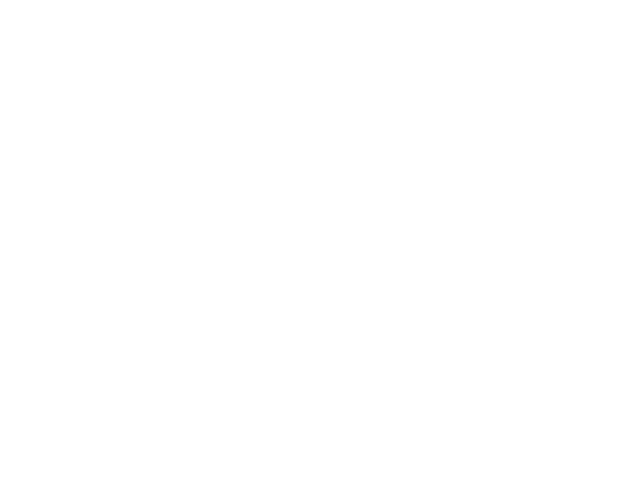

[(-5.0, 60.0),
 (-5.0, 60.0),
 Text(0.5, 0, 'Santos 21 period (d)'),
 Text(0, 0.5, 'LS period (d)')]

In [6]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.scatter(p_r_t, ls_tess_a, c=period_state, s=10)
ax.plot(range(-10,150),range(-10,150),'k-', lw=1)
ax.set(xlim=(-5, 60), ylim=(-5,60),
       xlabel='Santos 21 period (d)', ylabel='LS period (d)')

In [ ]:
features = np.array([ls_tess_a, ls_tess_b, ls_tess_c,
                    ls_tess_rms_a, ls_tess_rms_b, ls_tess_rms_c,
                    ls_tess_mad_a, ls_tess_mad_b, ls_tess_mad_c,
                    ls_tess2_a, ls_tess2_b, ls_tess2_c,
                    ls_tess2_rms_a, ls_tess2_rms_b, ls_tess2_rms_c,
                    ls_tess2_mad_a, ls_tess2_mad_b, ls_tess2_mad_c,
                    acf_tess_a, acf_tess_b, acf_tess_c,
                    acf_tess_rms_a, acf_tess_rms_b, acf_tess_rms_c,
                    acf_tess_mad_a, acf_tess_mad_b, acf_tess_mad_c,
                    ls_med_tess, ls2_med_tess, rvar_tess, cdpp_tess])#,
                    #kp_t, teff_t])#, flag_binary_t, flag_koi_t])
feature_names = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                 'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                 'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                 'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                 'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                 'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                 'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                 'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                 'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
                 'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [ ]:
features[np.isnan(features)] = 0

In [9]:
forest = RandomForestClassifier(random_state=0)
forest.fit(features.T, period_state)

RandomForestClassifier(random_state=0)

In [10]:
importances = forest.feature_importances_

In [11]:
for i, val in enumerate(importances):
    print(f'{feature_names[i]}: {val:.5f}')

LS Period 1st peak (d): 0.02932
LS Period 2nd peak (d): 0.02668
LS Period 3rd peak (d): 0.03246
LS Period 1st RMS: 0.03018
LS Period 2nd RMS: 0.02148
LS Period 3rd RMS: 0.01433
LS Period 1st MAD: 0.03987
LS Period 2nd MAD: 0.01702
LS Period 3rd MAD: 0.01388
LS 2-term Period 1st peak (d): 0.02452
LS 2-term Period 2nd peak (d): 0.02756
LS 2-term Period 3rd peak (d): 0.02690
LS 2-term Period 1st RMS: 0.02730
LS 2-term Period 2nd RMS: 0.02183
LS 2-term Period 3rd RMS: 0.01391
LS 2-term Period 1st MAD: 0.02667
LS 2-term Period 2nd MAD: 0.02063
LS 2-term Period 3rd MAD: 0.01395
ACF Period 1st peak (d): 0.02145
ACF Period 2nd peak (d): 0.01975
ACF Period 3rd peak (d): 0.01944
ACF Period 1st RMS: 0.03280
ACF Period 2nd RMS: 0.01860
ACF Period 3rd RMS: 0.01537
ACF Period 1st MAD: 0.03036
ACF Period 2nd MAD: 0.01631
ACF Period 3rd MAD: 0.01685
LS median power: 0.14910
LS 2-term median power: 0.15191
Rvar: 0.05169
CDPP: 0.02786


## Testing

In [12]:
test_list = glob.glob('./testsetdata/*_tess.csv')

test_data = []

for filename in test_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    test_data.append(df)
    
test_data = pd.concat(test_data, axis=0, ignore_index=True)

In [13]:
kic_t_test = test_data['KIC']
p_r_t_test = test_data['Santos Period (d)']

ls_tess_a_test = test_data['LS Period 1st peak (d)']
ls_tess_b_test = test_data['LS Period 2nd peak (d)']
ls_tess_c_test = test_data['LS Period 3rd peak (d)']
ls_tess_rms_a_test = test_data['LS Period 1st RMS']
ls_tess_rms_b_test = test_data['LS Period 2nd RMS']
ls_tess_rms_c_test = test_data['LS Period 3rd RMS']
ls_tess_mad_a_test = test_data['LS Period 1st MAD']
ls_tess_mad_b_test = test_data['LS Period 2nd MAD']
ls_tess_mad_c_test = test_data['LS Period 3rd MAD']
ls_tess2_a_test = test_data['LS 2-term Period 1st peak (d)']
ls_tess2_b_test = test_data['LS 2-term Period 2nd peak (d)']
ls_tess2_c_test = test_data['LS 2-term Period 3rd peak (d)']
ls_tess2_rms_a_test = test_data['LS 2-term Period 1st RMS']
ls_tess2_rms_b_test = test_data['LS 2-term Period 2nd RMS']
ls_tess2_rms_c_test = test_data['LS 2-term Period 3rd RMS']
ls_tess2_mad_a_test = test_data['LS 2-term Period 1st MAD']
ls_tess2_mad_b_test = test_data['LS 2-term Period 2nd MAD']
ls_tess2_mad_c_test = test_data['LS 2-term Period 3rd MAD']
acf_tess_a_test = test_data['ACF Period 1st peak (d)']
acf_tess_b_test = test_data['ACF Period 2nd peak (d)']
acf_tess_c_test = test_data['ACF Period 3rd peak (d)']
acf_tess_rms_a_test = test_data['ACF Period 1st RMS']
acf_tess_rms_b_test = test_data['ACF Period 2nd RMS']
acf_tess_rms_c_test = test_data['ACF Period 3rd RMS']
acf_tess_mad_a_test = test_data['ACF Period 1st MAD']
acf_tess_mad_b_test = test_data['ACF Period 2nd MAD']
acf_tess_mad_c_test = test_data['ACF Period 3rd MAD']
ls_med_tess_test = test_data['LS median power']
ls2_med_tess_test = test_data['LS 2-term median power']
rvar_tess_test = test_data['Rvar']
cdpp_tess_test = test_data['CDPP']

In [14]:
tst1 = pd.read_csv('S21r_test.csv')
tst2 = pd.read_csv('S21n_test.csv')
testing_set2 = pd.concat([tst1, tst2])
testing_set2 = testing_set2[~testing_set2.index.duplicated()]
kic_match2 = testing_set2['KIC']
kp_match2 = testing_set2['Kp']
teff_match2 = testing_set2['Teff']
binary_match2 = testing_set2['Flag_Binary']
koi_match2 = testing_set2['Flag_KOI']
# sph_match = training_set['Sph']

In [15]:
# kic_t_temp = kic_match2[:np.where(kic_match2==max(kic_t_test))[0][0]+1].reindex(kic_t_test).index.values
# kp_t_test = [m for (k, m) in zip(kic_match, kp_match) if k in kic_t_test.values]
# teff_t_test = [t for (k, t) in zip(kic_match, teff_match) if k in kic_t_test.values]
# flag_binary_t_test = [f for (k, f) in zip(kic_match, binary_match) if k in kic_t_test.values]
# flag_koi_t_test = [f for (k, f) in zip(kic_match, koi_match) if k in kic_t_test.values]
# sph_t = [s for (k, s) in zip(kic_match, sph_match) if k in kic_t.values]

In [16]:
test_features = np.array([ls_tess_a_test, ls_tess_b_test, ls_tess_c_test,
                    ls_tess_rms_a_test, ls_tess_rms_b_test, ls_tess_rms_c_test,
                    ls_tess_mad_a_test, ls_tess_mad_b_test, ls_tess_mad_c_test,
                    ls_tess2_a_test, ls_tess2_b_test, ls_tess2_c_test,
                    ls_tess2_rms_a_test, ls_tess2_rms_b_test, ls_tess2_rms_c_test,
                    ls_tess2_mad_a_test, ls_tess2_mad_b_test, ls_tess2_mad_c_test,
                    acf_tess_a_test, acf_tess_b_test, acf_tess_c_test,
                    acf_tess_rms_a_test, acf_tess_rms_b_test, acf_tess_rms_c_test,
                    acf_tess_mad_a_test, acf_tess_mad_b_test, acf_tess_mad_c_test,
                    ls_med_tess_test, ls2_med_tess_test, rvar_tess_test, cdpp_tess_test])#,
#                     kp_t_test, teff_t_test])#, flag_binary_t_test, flag_koi_t_test])
test_feature_names = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                 'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                 'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                 'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                 'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                 'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                 'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                 'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                 'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
                 'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [17]:
test_features[np.isnan(test_features)] = 0

In [18]:
predictions = forest.predict(test_features.T)

In [19]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

<IPython.core.display.Javascript object>


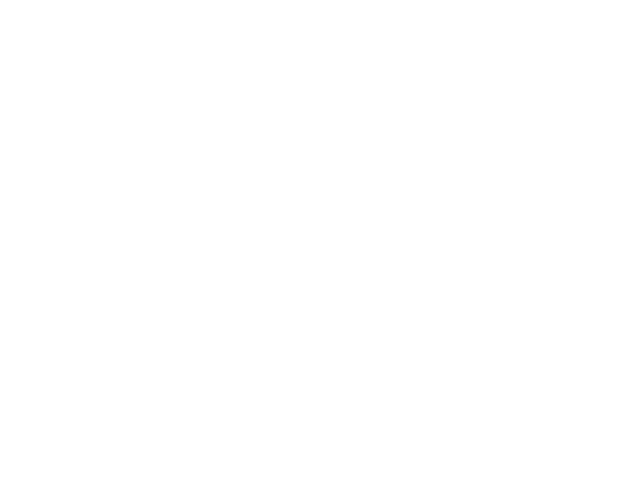

[(-5.0, 60.0),
 (-5.0, 60.0),
 Text(0.5, 0, 'Santos 21 period (d)'),
 Text(0, 0.5, 'LS period (d)')]

In [20]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.scatter(p_r_t_test, ls_tess_a_test, c=predictions, s=10)
ax.plot(range(-10,150),range(-10,150),'k-', lw=1)
ax.set(xlim=(-5, 60), ylim=(-5,60),
       xlabel='Santos 21 period (d)', ylabel='LS period (d)')

In [21]:
peri_pred = [p for (p, k) in zip(predictions, testing_set2['KIC'].values) if k in tst1['KIC'].values]
null_pred = [p for (p, k) in zip(predictions, testing_set2['KIC'].values) if k in tst2['KIC'].values]

In [22]:
peri_pred.count(1)/len(peri_pred)

0.08564186130726055

In [23]:
null_pred.count(1)/len(null_pred)

0.08742787200559539

In [24]:
residuals = ls_tess_a_test[p_r_t_test>0] / p_r_t_test[p_r_t_test>0]
residuals_yeah = ls_tess_a_test[(p_r_t_test>0)&(predictions==1)] / p_r_t_test[(p_r_t_test>0)&(predictions==1)]
residuals_nope = ls_tess_a_test[(p_r_t_test>0)&(predictions==0)] / p_r_t_test[(p_r_t_test>0)&(predictions==0)]

<IPython.core.display.Javascript object>


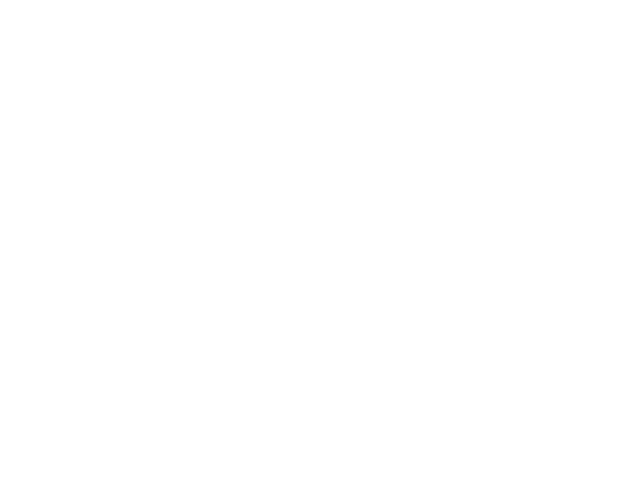

[(0.0, 20.0), Text(0.5, 0, 'residuals'), Text(0, 0.5, 'density')]

In [25]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(residuals_yeah, bins=np.arange(0,int(np.ceil(max(residuals_yeah))),0.5), log=True, density=True, color='#ffea00')
ax.hist(residuals_nope, bins=np.arange(0,int(np.ceil(max(residuals_nope))),0.5), log=True, density=True, color='#380057', alpha=0.5)
ax.set(xlim=(0,20), #ylim=(-5,60),
       xlabel='residuals', ylabel='density')

In [26]:
pred_yeah = ls_tess_a_test[(p_r_t_test>0)&(predictions==1)]
pred_nope = ls_tess_a_test[(p_r_t_test>0)&(predictions==0)]

<IPython.core.display.Javascript object>


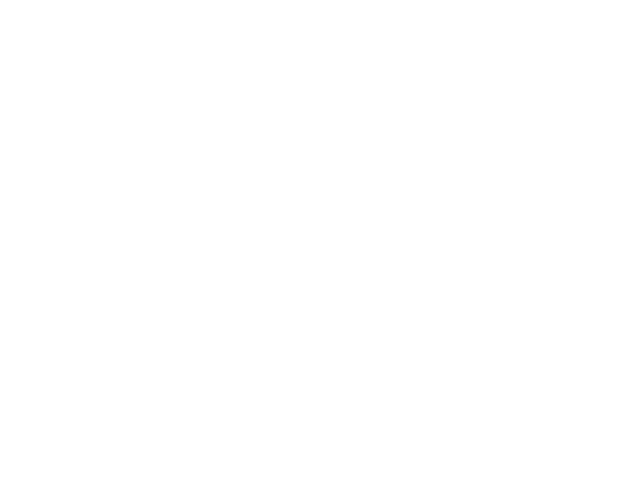

[(0.0, 40.0),
 Text(0.5, 0, 'LS TESS period: rotators (d)'),
 Text(0, 0.5, 'density')]

In [27]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(pred_yeah, bins=np.arange(0,int(np.ceil(max(pred_yeah))),0.5), log=False, 
        density=True, color='#ffea00')
ax.hist(pred_nope, bins=np.arange(0,int(np.ceil(max(pred_nope))),0.5), log=False, 
        density=True, color='#380057', alpha=0.5)
ax.set(xlim=(0,40), #ylim=(-5,60),
       xlabel='LS TESS period: rotators (d)', ylabel='density')

In [28]:
null_yeah = ls_tess_a_test[(p_r_t_test==0)&(predictions==1)]
null_nope = ls_tess_a_test[(p_r_t_test==0)&(predictions==0)]

<IPython.core.display.Javascript object>


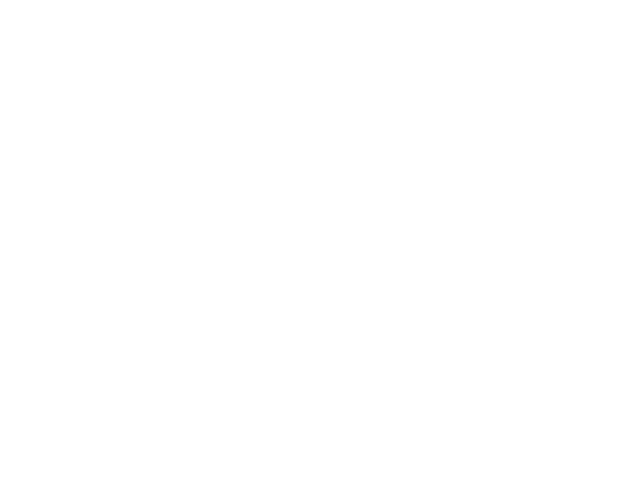

[(0.0, 25.0),
 Text(0.5, 0, 'LS TESS period: non-rotators (d)'),
 Text(0, 0.5, 'density')]

In [29]:
%matplotlib notebook

fig, ax = plt.subplots(1)
ax.hist(null_yeah, bins=np.arange(0,int(np.ceil(max(null_yeah))),0.5), log=False, 
        density=True, color='#ffea00')
ax.hist(null_nope, bins=np.arange(0,int(np.ceil(max(null_nope))),0.5), log=False, 
        density=True, color='#380057', alpha=0.5)
ax.set(xlim=(0,25), #ylim=(-5,60),
       xlabel='LS TESS period: non-rotators (d)', ylabel='density')

In [30]:
# top_ten = [(f, n) for _, f, n in sorted(zip(importances, test_features, test_feature_names), reverse=True)][-10:]
corner_features = [f for _, f in sorted(zip(importances, test_features), reverse=True)][:10]
corner_feature_names = [n for _, n in sorted(zip(importances, test_feature_names), reverse=True)][:10]

In [31]:
min(corner_features[9]), max(corner_features[9])

(14.092500514071803, 321542.5682330173)

<IPython.core.display.Javascript object>


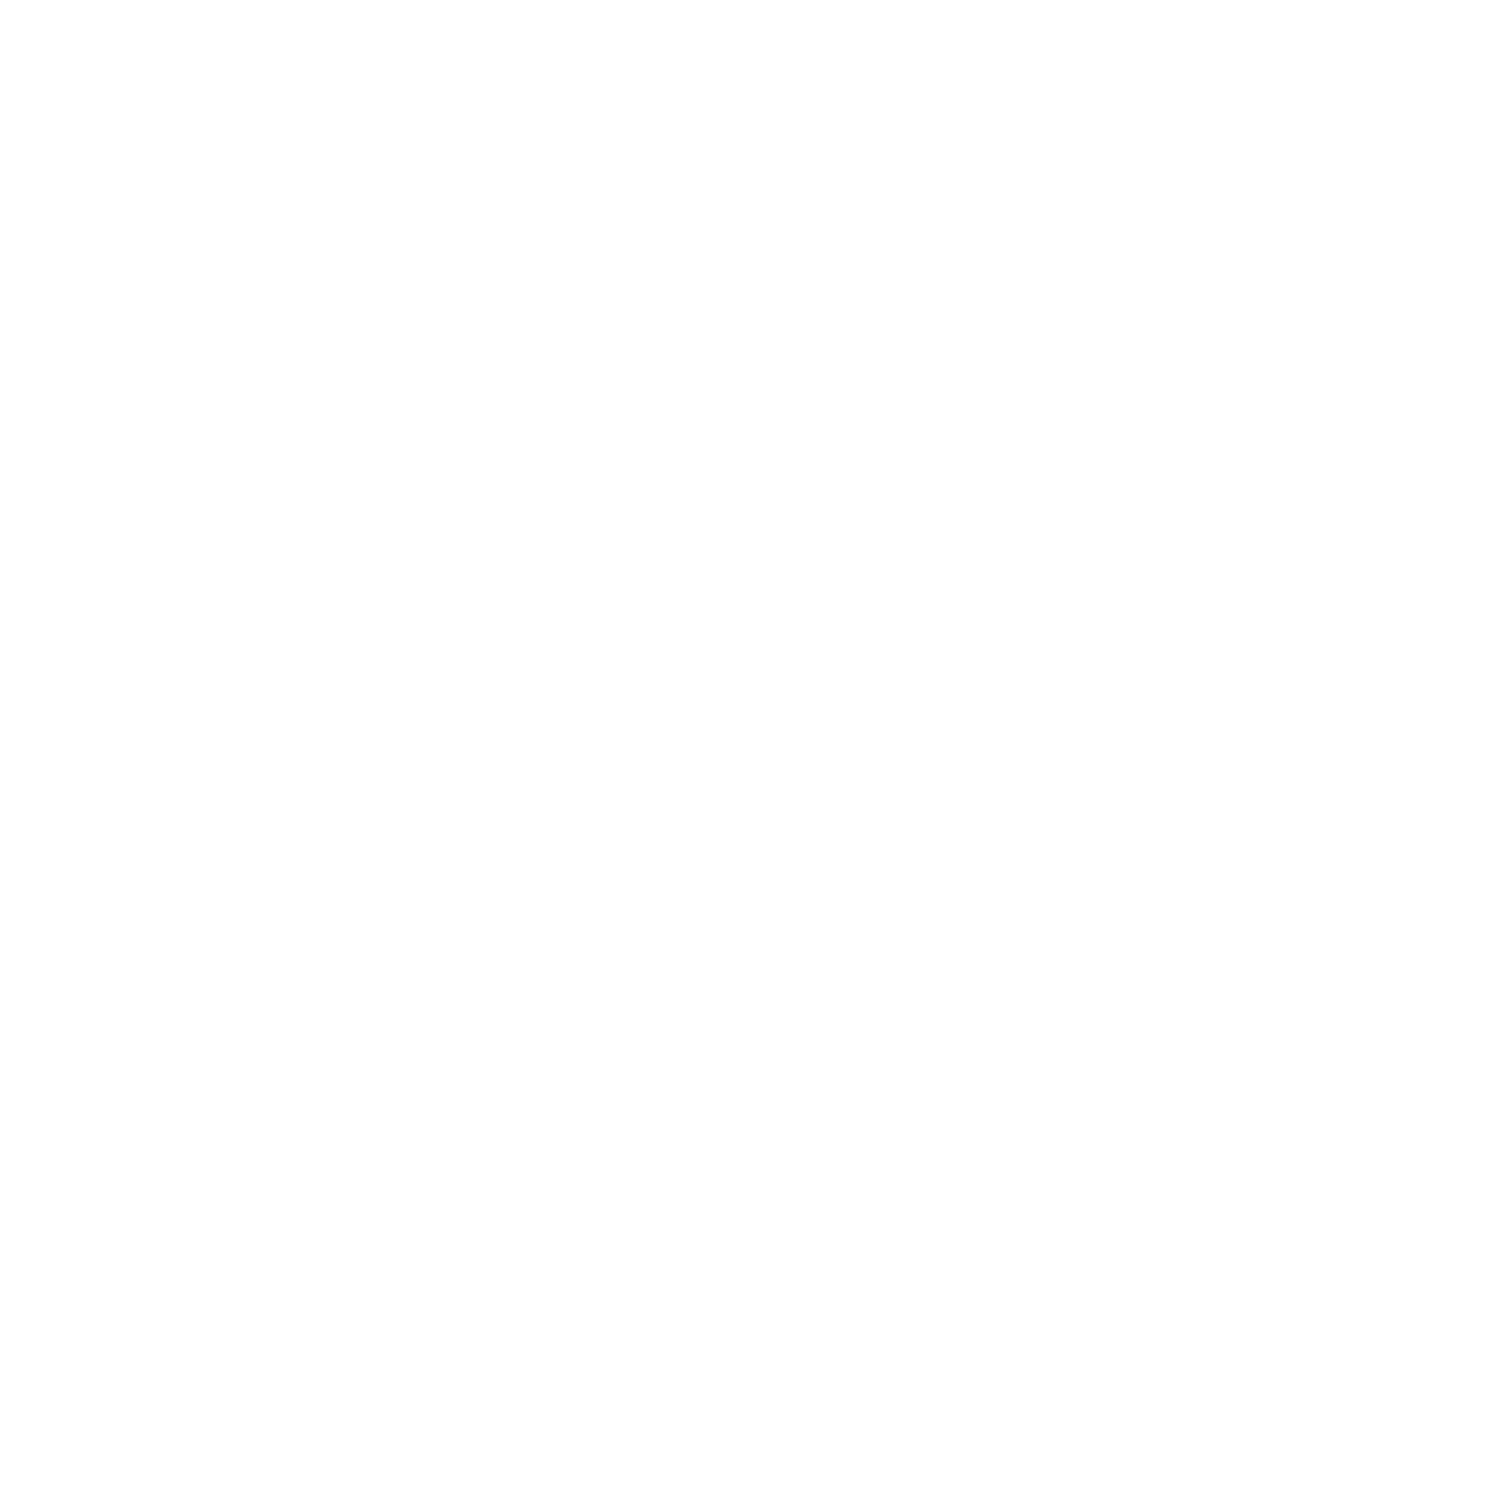

Text(0.09, 0.95, 'all')

In [32]:
%matplotlib notebook

fig = plt.figure(figsize=(15,15), constrained_layout=True)
grid = gs.GridSpec(10,10, figure=fig)

for i in range(10):
    for j in range(10):
        if i > j:
            ax = fig.add_subplot(grid[i,j])
            ax.scatter(corner_features[j], corner_features[i], c=predictions, s=2)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.tick_params(direction='in')
            if i == 9:
                ax.set_xlabel(corner_feature_names[j], rotation=10)
            if j == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)

fig.suptitle('all', x=0.09, y=0.95)

<IPython.core.display.Javascript object>


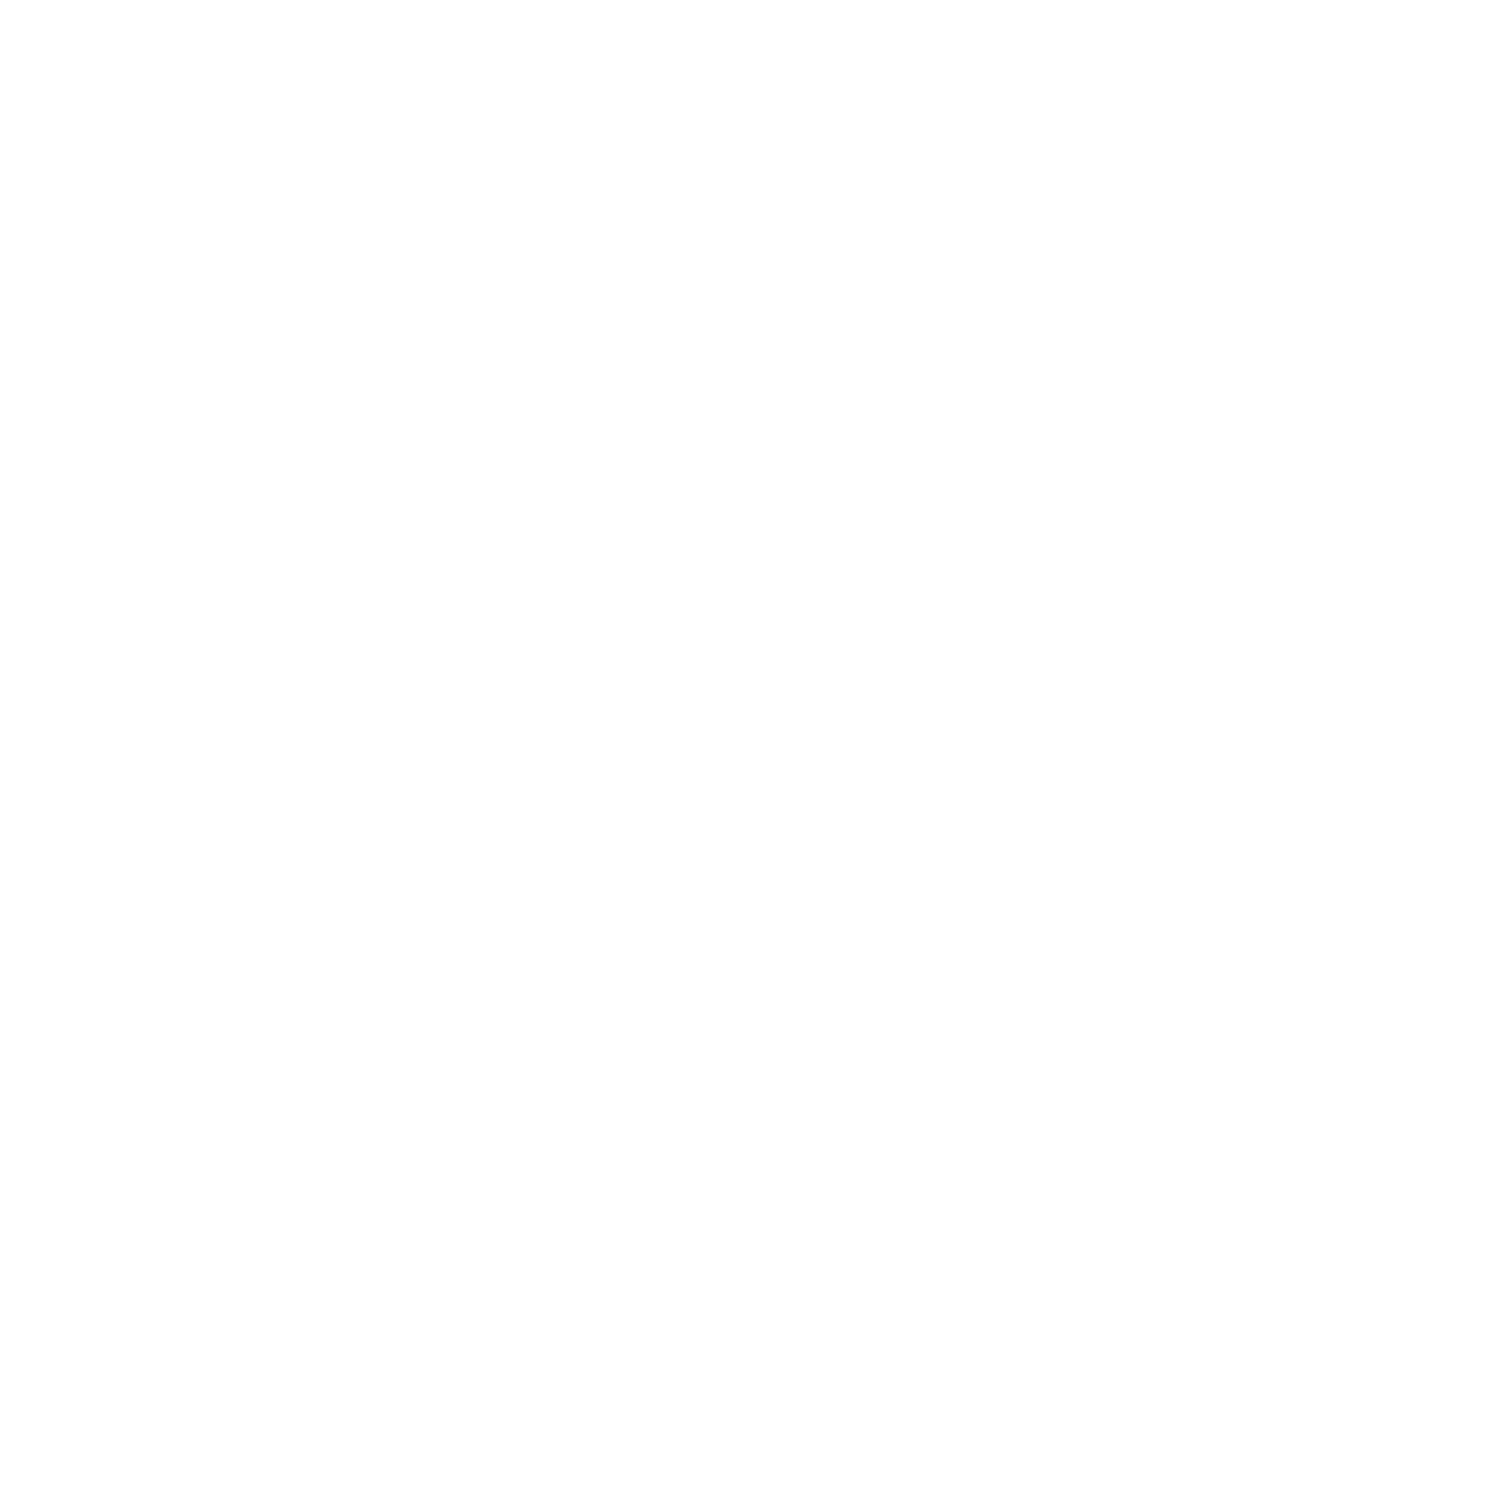

Text(0.09, 0.95, 'S21 rotators')

In [33]:
%matplotlib notebook

fig = plt.figure(figsize=(15,15), constrained_layout=True)
grid = gs.GridSpec(10,10, figure=fig)

for i in range(10):
    for j in range(10):
        if i > j:
            ax = fig.add_subplot(grid[i,j])
            ax.scatter(corner_features[j][p_r_t_test>0], corner_features[i][p_r_t_test>0], 
                       c=predictions[p_r_t_test>0], s=2)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.tick_params(direction='in')
            if i == 9:
                ax.set_xlabel(corner_feature_names[j], rotation=10)
            if j == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)

fig.suptitle('S21 rotators', x=0.09, y=0.95)

<IPython.core.display.Javascript object>


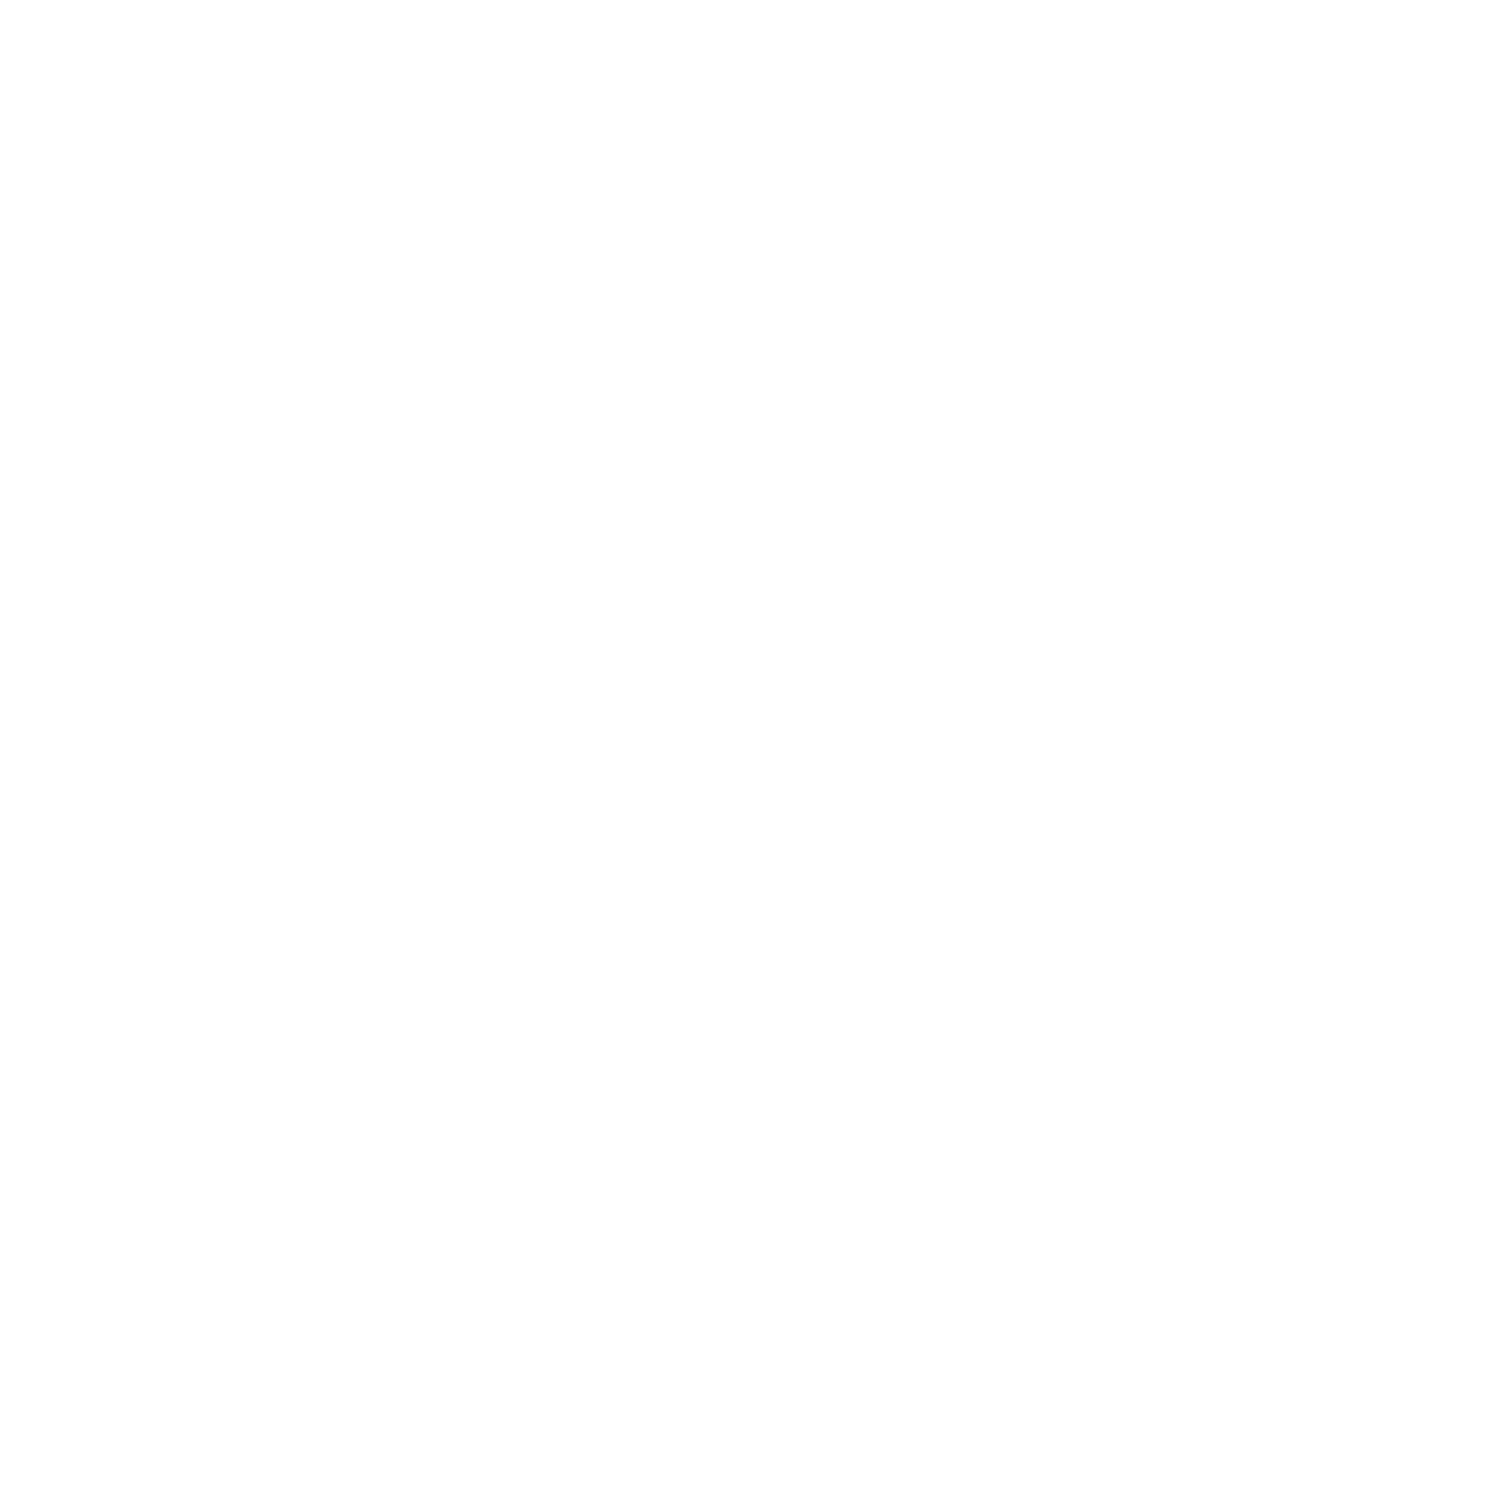

Text(0.09, 0.95, 'S21 nonrotators')

In [34]:
%matplotlib notebook

fig = plt.figure(figsize=(15,15), constrained_layout=True)
grid = gs.GridSpec(10,10, figure=fig)

for i in range(10):
    for j in range(10):
        if i > j:
            ax = fig.add_subplot(grid[i,j])
            ax.scatter(corner_features[j][p_r_t_test==0], corner_features[i][p_r_t_test==0],
                       c=predictions[p_r_t_test==0], s=2)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.tick_params(direction='in')
            if i == 9:
                ax.set_xlabel(corner_feature_names[j], rotation=10)
            if j == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)

fig.suptitle('S21 nonrotators', x=0.09, y=0.95)

<IPython.core.display.Javascript object>


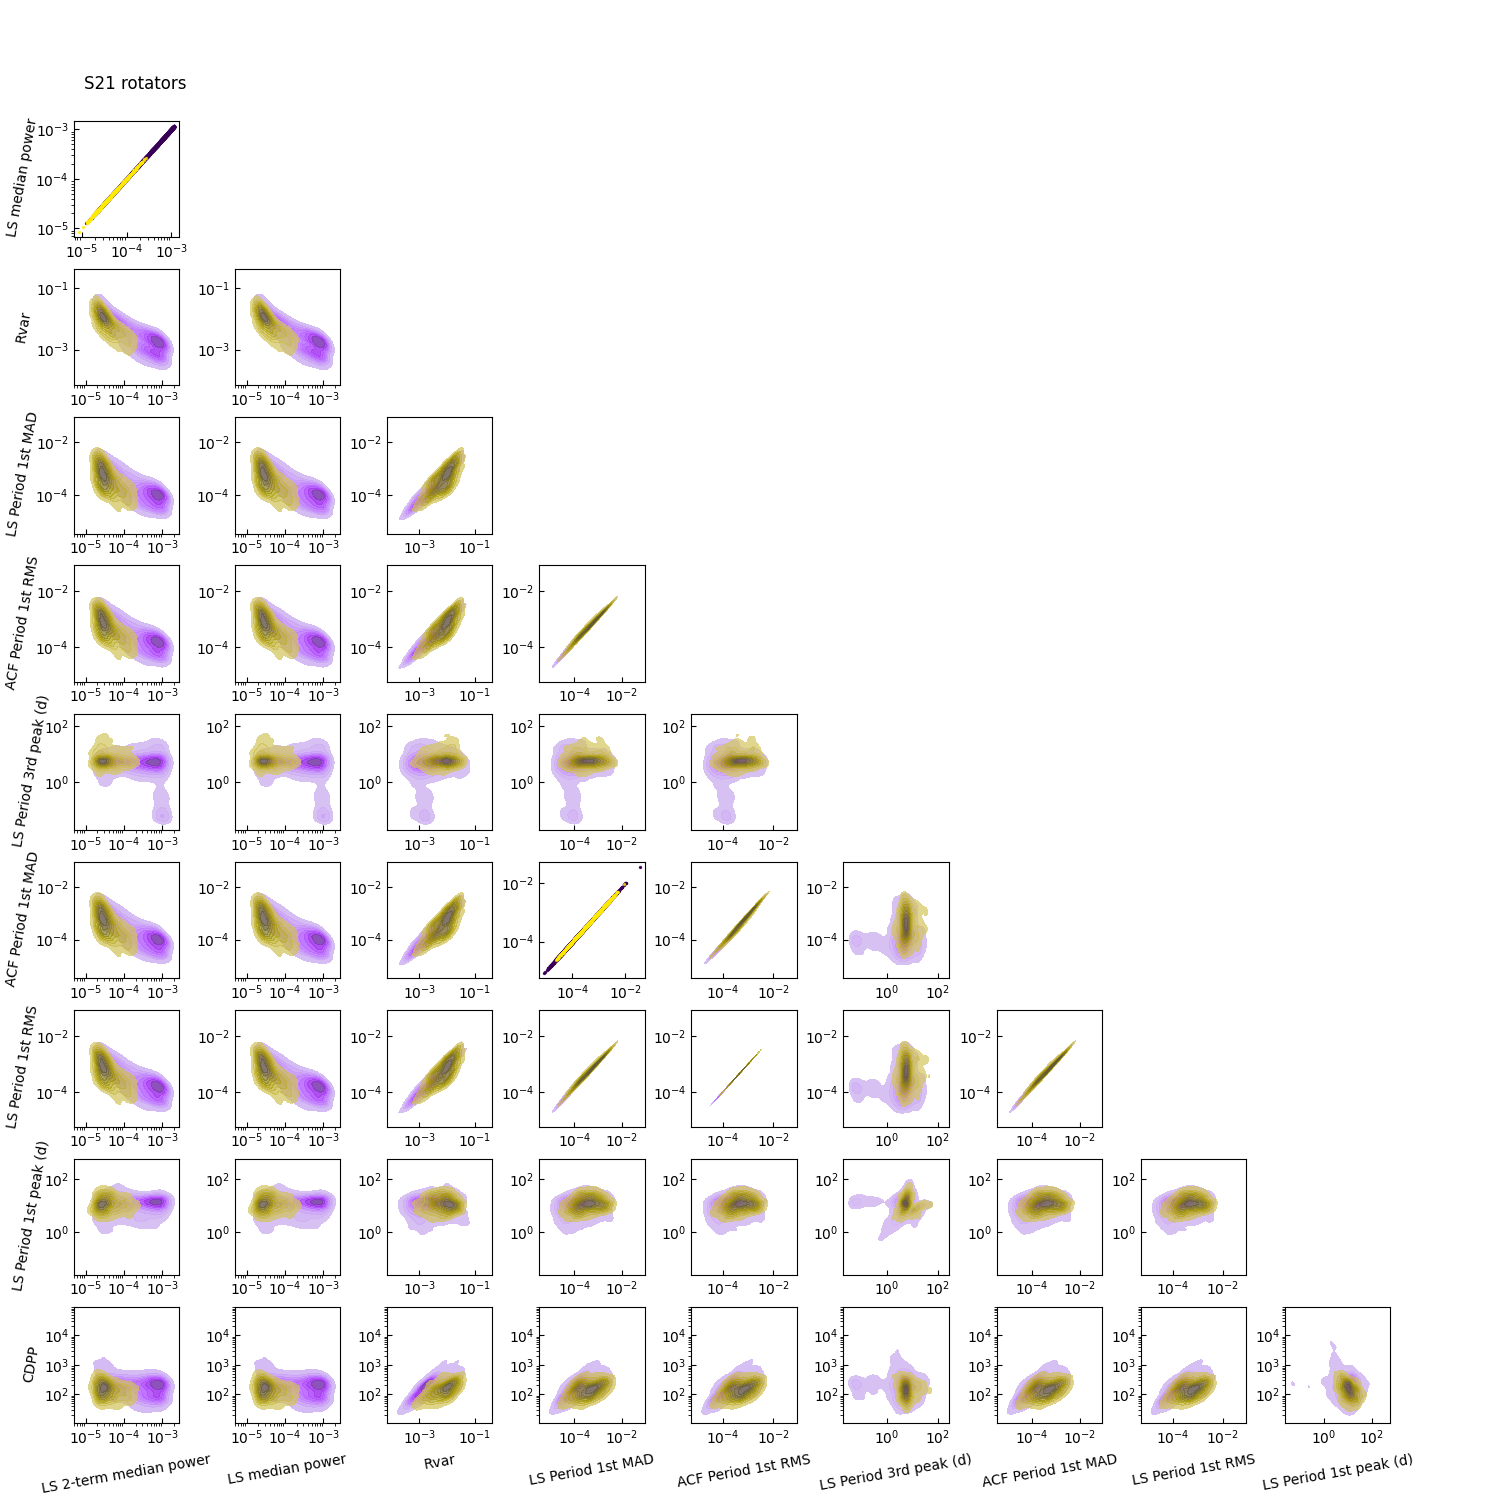

Text(0.09, 0.95, 'S21 rotators')

In [37]:
%matplotlib notebook

fig = plt.figure(figsize=(15,15), constrained_layout=True)
grid = gs.GridSpec(10,10, figure=fig)

for i in range(10):
    for j in range(10):
        if i > j:
            ax = fig.add_subplot(grid[i,j])
            try:
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test>0) & (predictions==0)],
                            y=corner_features[i][(p_r_t_test>0) & (predictions==0)],
                            fill=True, alpha=0.9, color='#380057', log_scale=True)
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test>0) & (predictions==1)],
                            y=corner_features[i][(p_r_t_test>0) & (predictions==1)],
                            fill=True, alpha=0.7, color='#ffea00', log_scale=True)
            except:
                ax.scatter(corner_features[j][(p_r_t_test>0) & (predictions==0)],
                            corner_features[i][(p_r_t_test>0) & (predictions==0)],
                            s=2, color='#380057', alpha=0.9)
                ax.scatter(corner_features[j][(p_r_t_test>0) & (predictions==1)],
                            corner_features[i][(p_r_t_test>0) & (predictions==1)],
                            s=2, color='#ffea00', alpha=0.7)
                ax.set_xscale('log')
                ax.set_yscale('log')
            ax.tick_params(direction='in')
            if i == 9:
                ax.set_xlabel(corner_feature_names[j], rotation=10)
            if j == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)

fig.suptitle('S21 rotators', x=0.09, y=0.95)

<IPython.core.display.Javascript object>


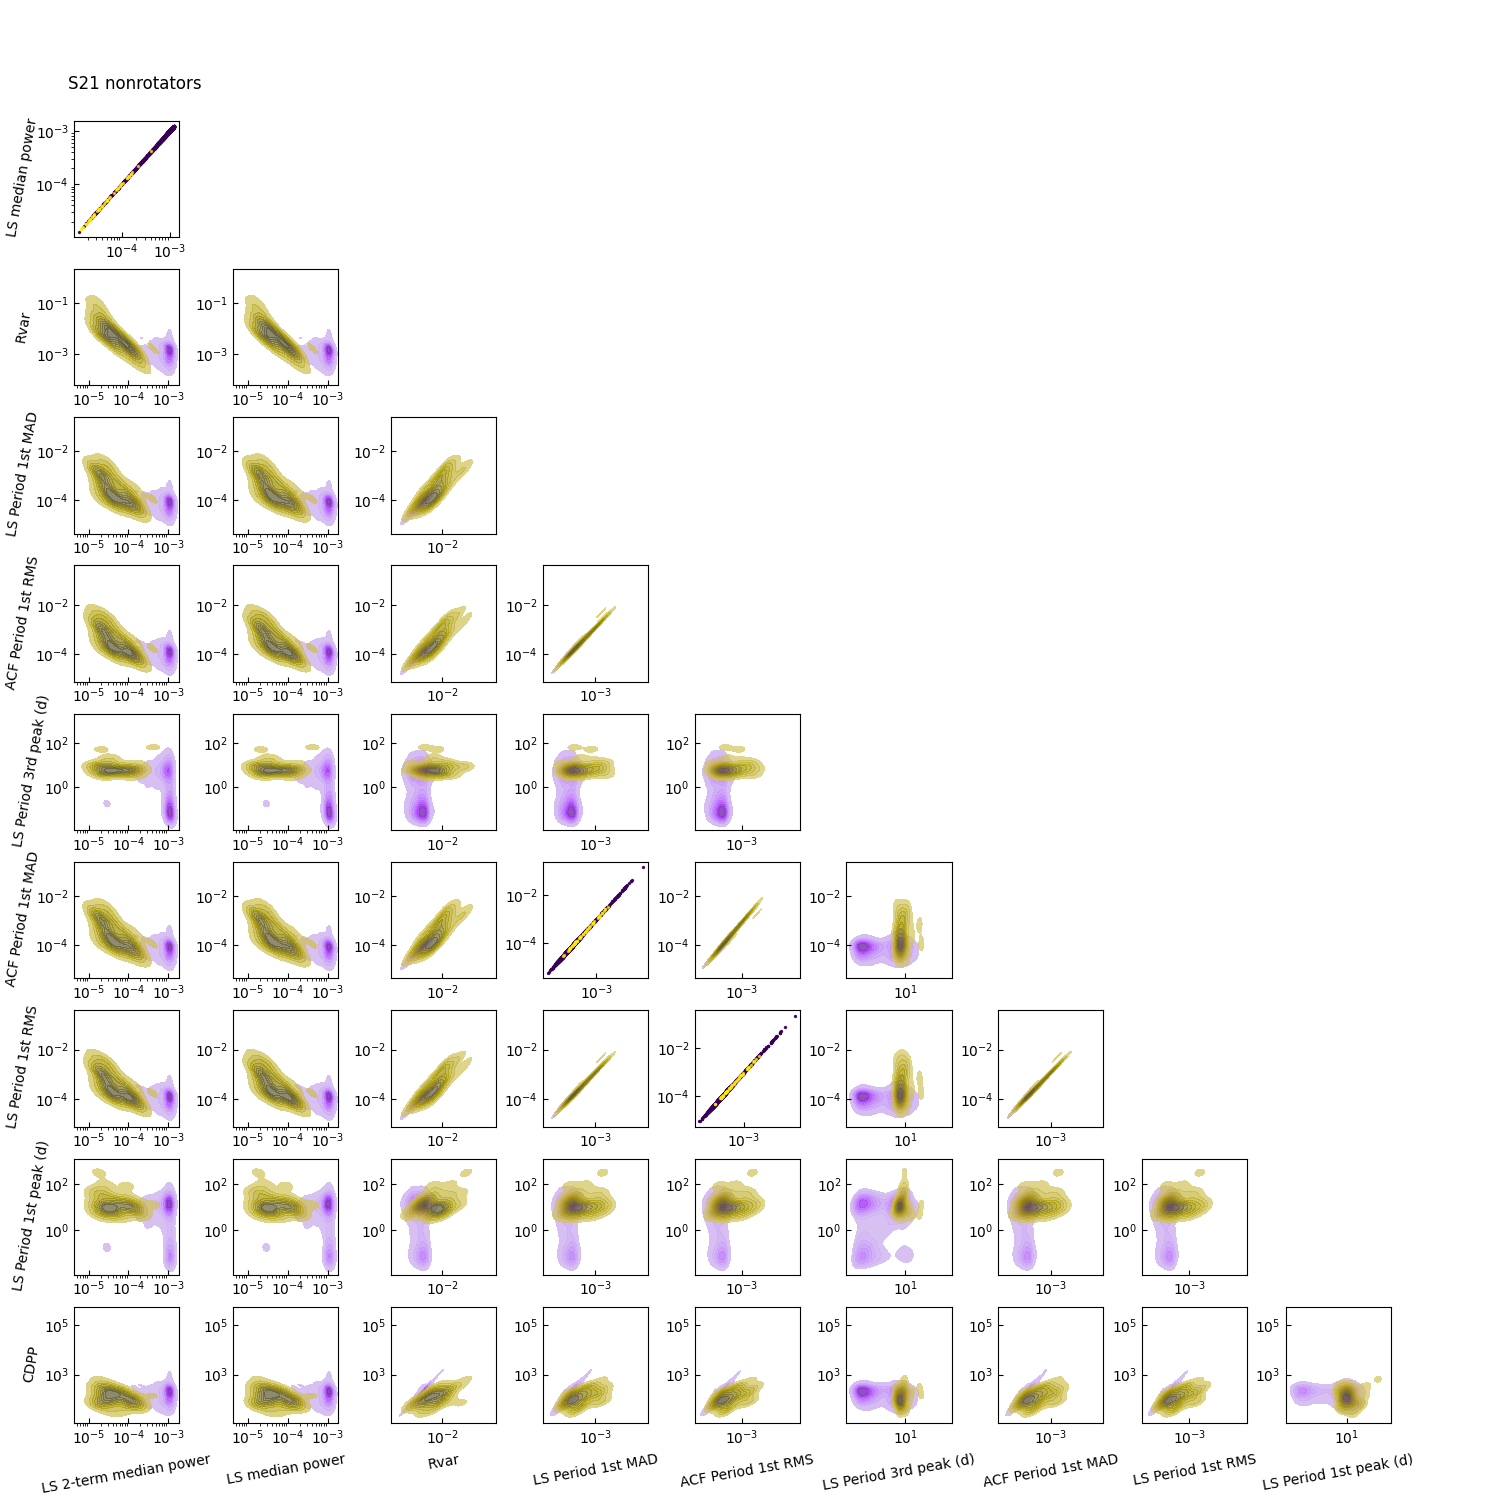

Text(0.09, 0.95, 'S21 nonrotators')

In [36]:
%matplotlib notebook

fig = plt.figure(figsize=(15,15), constrained_layout=True)
grid = gs.GridSpec(10,10, figure=fig)

for i in range(10):
    for j in range(10):
        if i > j:
            ax = fig.add_subplot(grid[i,j])
            try:
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==0)],
                            y=corner_features[i][(p_r_t_test==0) & (predictions==0)],
                            fill=True, alpha=0.9, color='#380057', log_scale=True)
                sns.kdeplot(ax=ax, x=corner_features[j][(p_r_t_test==0) & (predictions==1)],
                            y=corner_features[i][(p_r_t_test==0) & (predictions==1)],
                            fill=True, alpha=0.7, color='#ffea00', log_scale=True)
            except:
                ax.scatter(corner_features[j][(p_r_t_test==0) & (predictions==0)],
                            corner_features[i][(p_r_t_test==0) & (predictions==0)],
                            s=2, color='#380057', alpha=0.9)
                ax.scatter(corner_features[j][(p_r_t_test==0) & (predictions==1)],
                            corner_features[i][(p_r_t_test==0) & (predictions==1)],
                            s=2, color='#ffea00', alpha=0.7)
                ax.set_xscale('log')
                ax.set_yscale('log')
            ax.tick_params(direction='in')
            if i == 9:
                ax.set_xlabel(corner_feature_names[j], rotation=10)
            if j == 0:
                ax.set_ylabel(corner_feature_names[i], rotation=80)

fig.suptitle('S21 nonrotators', x=0.09, y=0.95)